<a href="https://colab.research.google.com/github/rajarishiR/programm/blob/main/Copy_of_DataPreprocessing_Assignment11_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Importing dataset**

In [2]:
df = pd.read_csv('/content/Data (1).csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 3: Handling the missing data**

In [3]:
df['Age'] = df['Age'].replace(np.nan, df.Age.mode().values[0])
df['Age'] = df['Age'].astype('int64')
df['Salary'] = df['Salary'].replace(np.nan, df.Salary.mode().values[0])
df['Salary'] = df['Salary'].astype('int64')
df

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,48000,Yes
5,France,35,58000,Yes
6,Spain,27,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


**Step 4: Encoding categorical data**

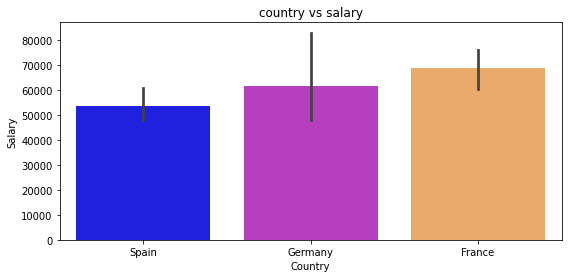

In [4]:
plt.figure(figsize=(9,4))
sns.barplot(data=df, x='Country',y='Salary', order=df.groupby('Country')['Salary'].mean().reset_index().sort_values('Salary')['Country'], palette='gnuplot2')
plt.title("country vs salary")
plt.show()

In [5]:
df.Country = df.Country.map({'Spain':1,'Germany':2,'France':3})
df.Purchased = df.Purchased.map({'Yes':1,'No':2})
df

,Country,Age,Salary,Purchased
0,3,44,72000,2
1,1,27,48000,1
2,2,30,54000,2
3,1,38,61000,2
4,2,40,48000,1
5,3,35,58000,1
6,1,27,52000,2
7,3,48,79000,1
8,2,50,83000,2
9,3,37,67000,1


**Step 6: Splitting the datasets into training sets and Test sets**

In [6]:
x = df.drop(['Purchased'], axis=1)
y = df.Purchased

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=3)

**Step 7: Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)